# Lab.4.04  Data cleaning and wrangling

In [297]:
# 1.Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
import datetime

In [298]:
# 2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [299]:
# 3.Rename the columns so they follow the PE8 (snake case)
cols = [i.lower() for i in customer_df.columns]
customer_df.columns = cols 
cols = [i.replace(' ','_') for i in customer_df.columns]
customer_df.columns = cols 


In [300]:
# 4.Load the continuous and discrete variables into continuous_df and discrete_df variables.
customer_df_cat = customer_df.select_dtypes(object)
customer_df_num = customer_df.select_dtypes(np.number)
dis = []
cont = [] 

for i in customer_df_num.columns:
    if customer_df_num[i].nunique() > 100:
        cont.append(i)
    else:
        dis.append(i)

In [301]:
discrete_df = customer_df_num.drop(columns = cont)
continuous_df = customer_df_num.drop(columns = dis)

In [302]:
# 5.We can use customer ID as index.
customer_df.set_index('customer')

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


## 1.We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [303]:
# We decided  that all the outliers make sense, so we decided no to remove them.

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


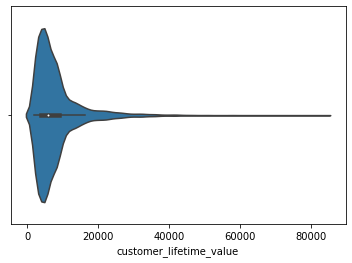

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


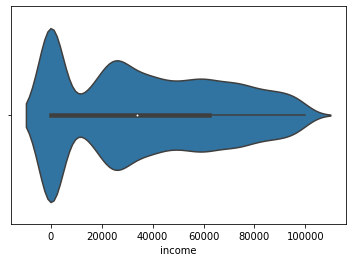

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


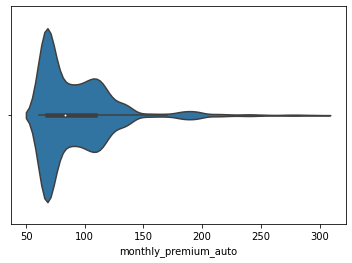

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


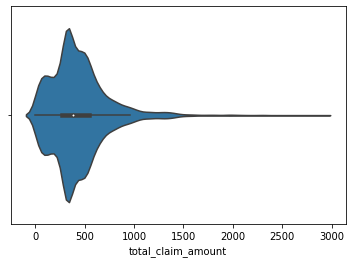

In [304]:
for i in continuous_df.columns:
    sns.violinplot(continuous_df[i])
    plt.show()

## 2.Create a copy of the dataframe for the data wrangling.

In [305]:
customer_df_w = customer_df.copy()
customer_df_w.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 3.Normalize the continuous variables. You can use any one method you want

In [306]:
customer_df_cat = customer_df_w.select_dtypes(object).copy()
customer_df_num = customer_df_w.select_dtypes(np.number)

discrete_df = customer_df_num.drop(columns = cont)
continuous_df = customer_df_num.drop(columns = dis)

In [307]:
transformer = StandardScaler().fit(continuous_df)
continuous_df_normalized = transformer.transform(continuous_df)
continuous_df = pd.DataFrame(continuous_df_normalized, columns = continuous_df.columns)
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,-0.762878,0.612827,-0.703925,-0.169640
1,-0.149245,-1.239617,0.022691,2.400737
2,0.710636,0.365710,0.429596,0.455734
3,-0.052263,-1.239617,0.371467,0.329769
4,-0.755575,0.203390,-0.587666,-1.018843


## 4.Encode the categorical variables

In [308]:
customer_df_cat['coverage'] = customer_df_cat['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
customer_df_cat['employmentstatus'] = customer_df_cat['employmentstatus'].map({"Employed" : 4, "Unemployed" : 0, "Medical Leave" : 2,"Disabled" : 1,"Retired" : 3})
customer_df_cat['location_code'] = customer_df_cat['location_code'].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
customer_df_cat['vehicle_size'] = customer_df_cat['vehicle_size'].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
customer_df_cat_lab = customer_df_cat[['coverage','employmentstatus','location_code','vehicle_size']]

In [309]:
customer_df_cat_lab.head()

,coverage,employmentstatus,location_code,vehicle_size
0,0,4,0,1
1,1,0,0,1
2,2,4,0,1
3,0,0,0,1
4,0,4,1,1


In [310]:
customer_df_cat_onehot = customer_df_cat.drop(['customer','effective_to_date','coverage','employmentstatus','location_code','vehicle_size'],axis=1)

customer_df_cat_hot = pd.get_dummies(customer_df_cat_onehot)
customer_df_cat_hot.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,education_Bachelor,education_College,education_Doctor,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## 5.The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [311]:
customer_df_cat['effective_to_date'] = pd.to_datetime(customer_df_cat['effective_to_date'])

In [312]:
customer_df_cat['effective_to_date'] = customer_df_cat['effective_to_date'].dt.strftime('%d%m')

In [313]:
customer_df_cat['effective_to_date'] = pd.to_numeric(customer_df_cat['effective_to_date'])

## 6.Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [319]:
# We can say that all columns has numerical info.
categorical = pd.concat([customer_df_cat_hot,customer_df_cat_lab,customer_df_cat['effective_to_date']], axis=1)
categorical.dtypes

state_Arizona                     uint8
state_California                  uint8
state_Nevada                      uint8
state_Oregon                      uint8
state_Washington                  uint8
response_No                       uint8
response_Yes                      uint8
education_Bachelor                uint8
education_College                 uint8
education_Doctor                  uint8
education_High School or Below    uint8
education_Master                  uint8
gender_F                          uint8
gender_M                          uint8
marital_status_Divorced           uint8
marital_status_Married            uint8
marital_status_Single             uint8
policy_type_Corporate Auto        uint8
policy_type_Personal Auto         uint8
policy_type_Special Auto          uint8
policy_Corporate L1               uint8
policy_Corporate L2               uint8
policy_Corporate L3               uint8
policy_Personal L1                uint8
policy_Personal L2                uint8
